# NRS - Project Work - Group 1

In [1]:
#Import (Einlesen der persönlichen Variablen - Datei ist in Home/Projekt/Notebooks zu pflegen: persoenliche_variablen.py)
import persoenliche_variablen
import os

In [14]:
#Initialisierungsskipt von notebooks auf O/33/MNC kopieren - Nur Oliver, nur nach Änderungen!!!!
#import os
#befehl = 'scp ' + persoenliche_variablen.path_notebooks + 'initialisierung.py ' + "'" + 'de' + '\\' + persoenliche_variablen.user + "'" + "@lde510fp.de.top.com:/media/o_33_mnc/"
#print(befehl)
#os.system(befehl)

In [2]:
#Initialisierungsskipt von O/33/MNC auf notebooks kopieren
import os
befehl = 'scp ' + "'" + 'de' + '\\' + persoenliche_variablen.user + "'" + "@lde510fp.de.top.com:/media/o_33_mnc/" + 'initialisierung.py ' + persoenliche_variablen.path_notebooks
print(befehl)
os.system(befehl)

scp 'de\v092403'@lde510fp.de.top.com:/media/o_33_mnc/initialisierung.py /home/v092403//PycharmProjects/P0407/P0407/notebooks/


0

In [3]:
#Import (Ausführen der Initialisierung)
import initialisierung

In [4]:
# Enable messages in jupyter notebook
import sys

import pyspark
conf = (pyspark.SparkConf()
#        .setAppName('pyspark_test4')
#        .setMaster('yarn')
#        .set("spark.sql.broadcastTimeout", "36000")
#        .set('spark.executor.instances', '5') # Anzahl der Executor-Instanzen - verteilt auf die 5 Worker
#        .set('spark.executor.cores', '14') # Anzahl der Kerne pro Executor
#        .set('spark.executor.memory', '14G') # Reservierter Arbeitsspeicher pro Executor
#        .set('spark.driver.memory', '45G')
#        .set('spark.driver.maxResultSize', '10G')
        .set("spark.jars", "{path}spark-sas7bdat-3.0.0-s_2.12.jar,{path}parso-2.0.11.jar".format(path=persoenliche_variablen.path_data))
        )

sparkSession = pyspark.sql.SparkSession.builder.config(conf=conf).appName("pyspark_test5").enableHiveSupport().getOrCreate()

#Zum Einlesen verteilter .orc-Dateien
import pyarrow.orc

import pyexasol

#Parser zum teilen von SQL-Befehlen, die mittels Semikolon getrennt sind
import sqlparse

#Zum Auslesen und Nutzen von Pfadangaben
from pathlib import Path

#from pyspark.sql.types import IntegerType
#import pyspark.sql.functions as f
import pandas as pd #Daten lokal exportieren
import time
import os
import numpy as np
import sklearn
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from datetime import date, datetime
from datetime import timedelta


from pyhive import hive

#zusätzliche Importstatements von der Seite: http://spark.apache.org/docs/2.2.0/api/python/pyspark.sql.html
from pyspark.sql import DataFrame #A distributed collection of data grouped into named columns.
from pyspark.sql.types import * #List of data types available.
from pyspark.sql import functions as f #List of built-in functions available for DataFrame.
from pyspark.sql import Row # A row of data in a DataFrame.
from pyspark.sql import Column #A column expression in a DataFrame.
from pyspark.sql import DataFrameNaFunctions #Methods for handling missing data (null values).
from pyspark.sql import DataFrameStatFunctions #Methods for statistics functionality.
from pyspark.sql import Window #For working with window functions.
from pyspark.sql.functions import col
from pyspark.sql.functions import *

#Datenbankverbindung einrichten mittels SQLite
from sqlalchemy import create_engine
from sqlalchemy import inspect
from sqlalchemy import create_engine
from sqlalchemy import MetaData
from sqlalchemy import Table
from sqlalchemy import Column
from sqlalchemy import Integer, String

#import the sqlite3 module
import sqlite3

# Nur für Jupyter Notebook möglich: %matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import math


#Funktion zur Zeitausgabe
def show_exec_time(f, collect=False):
    start_time = time.time()
    res = f()
    if collect:
        res.collect()
    print("--- %s seconds ---" % (time.time() - start_time))
    return res

#Funktion zum Ausführen von mehreren SQL-Befehlen in Hive
def code_submit(code):
    """
    Function code_submit
    
    Aufruf mittels:
    code = 'drop table v092403.olitest_000001; create table v092403.olitest_000001 as select * from v092403.logfile;'
    und:
    code_submit(code)
    oder
    code_submit('drop table v092403.olitest_000001; create table v092403.olitest_000001 as select * from v092403.logfile;')
    
    """
    import sqlparse
    
    statements = sqlparse.split(code)

    statements=[s.strip(';') for s in statements]
    print(statements)

    for befehl in statements:
        hive_cursor.execute(befehl)
        logs = hive_cursor.fetch_logs()
        print(befehl)
        print(logs)
        print(' ')
        
        
        
        
#Funktion zum Ausführen von mehreren SQL-Befehlen in Hive aus .sql-Datei
skript_variablen = {}
skript_variablen["${dummyeingabe}"] = "dummyeingabe"
def code_sql(sql_file, hive_cursor, skript_variablen):
    """
    Function code_sql
    
    Aufruf mittels:
    sql_file=persoenliche_variablen.path_data + 'code_test.sql'
    UND
    code_sql(sql_file, hive_cursor, skript_variablen)
    
    Doku:https://sqlparse.readthedocs.io/en/latest/api/
    
    Falls Variablen übergeben werden sollen: Dictionary hierfür anlegen:
    #Dictionary für Variablen erstellen, z.B. mit folgendem Code:
    skript_variablen = {}
    skript_variablen["${stichtag}"] = "'2020-10-01 00:00:01.000000'"
    skript_variablen["${viewname}"] = "padi_ckpi_view"
    skript_variablen["${view_lib}"] = "v092403"
    
    """
    import sqlparse
    
    with open(sql_file, "r") as a_file:
        content = a_file.read()
        content=sqlparse.format(content, strip_comments=True) #reindent=True
        content = content.replace("\n", " ")
        for key in skript_variablen.keys():
             content= content.replace(key, skript_variablen[key])
    statements = sqlparse.split(content)
    statements=[s.strip(';') for s in statements]

    for befehl in statements:
        hive_cursor.execute(befehl)
        logs = hive_cursor.fetch_logs()
        print(befehl)
        print(logs)
        print(' ')

#Hive-SQL-Select-Statements einlesen & als Pandas Dataframe ausgeben
#(Tabellenbezeichnungen in den Attributnamen werden entfernt)
def read_sql(sql: str) -> pd.DataFrame:
    """
    Function read_sql
    
    Aufruf mittels:
    sql = "select * from " + persoenliche_variablen.user + ".padi_ckpi_view_erw_kw limit 1000"
    UND
    df_julia2 = read_sql(sql)
       
    """
    df = pd.read_sql(sql, hive_conn)

    #Variablennamen beim . abschneiden
    new_columns = [col.split(".")[1] for col in df.columns]

    df.columns=new_columns
    
    return df


#Verbindung für select-Abfragen zu Hive
hive_conn = hive.connect(host='lde0204p.de.top.com', port=10000, database='default', auth="KERBEROS",
                          kerberos_service_name='hive')
#Verbindung für execute-Statements zu Hive
hive_cursor = hive.connect(host='lde0204p.de.top.com', port=10000, database='default', auth="KERBEROS",
                              kerberos_service_name='hive').cursor()
#Verbindung für select-Abfragen zu Exasol
exasol_conn = pyexasol.connect(dsn='exasolprod02..06.de.top.com:8563', user=persoenliche_variablen.user, password=persoenliche_variablen.password, compression=True, fetch_dict=True)

#Orange aufrufen bei Bedarf
#!orange-canvas

### Libraries and Data import

In [5]:
import pandas as pd
import numpy as np

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

#for sentiment analysis
from textblob import TextBlob

missing_values = ['','Undefined', 'Undefined->Undefined'] #define values to be identified as NA in the datasets 

df_crm = pd.read_csv(persoenliche_variablen.path_data + '/Data_Scientist_Project_Work/crm_model.csv', keep_default_na=False, na_values=missing_values) #import CRM_model
df_finance = pd.read_csv(persoenliche_variablen.path_data + '/Data_Scientist_Project_Work/finance_model.csv', keep_default_na=False, na_values=missing_values) #import finance_model
df_sales = pd.read_csv(persoenliche_variablen.path_data + '/Data_Scientist_Project_Work/sales_model.csv', keep_default_na=False, na_values=missing_values) #import sales_model
df_twitter = pd.read_csv(persoenliche_variablen.path_data + '/Data_Scientist_Project_Work/twitter_model.csv', keep_default_na=False, na_values=missing_values) #import twitter_model

### Joining Datasets

In [6]:
#column id renaming to join the datasets
df_crm = df_crm.rename(columns={'ID_CRM': 'id'}) 
df_finance = df_finance.rename(columns={'ID_FINANCE': 'id'})
df_sales = df_sales.rename(columns={'ID_SALES': 'id'})
df_twitter = df_twitter.rename(columns={'ID_SALES': 'id'})

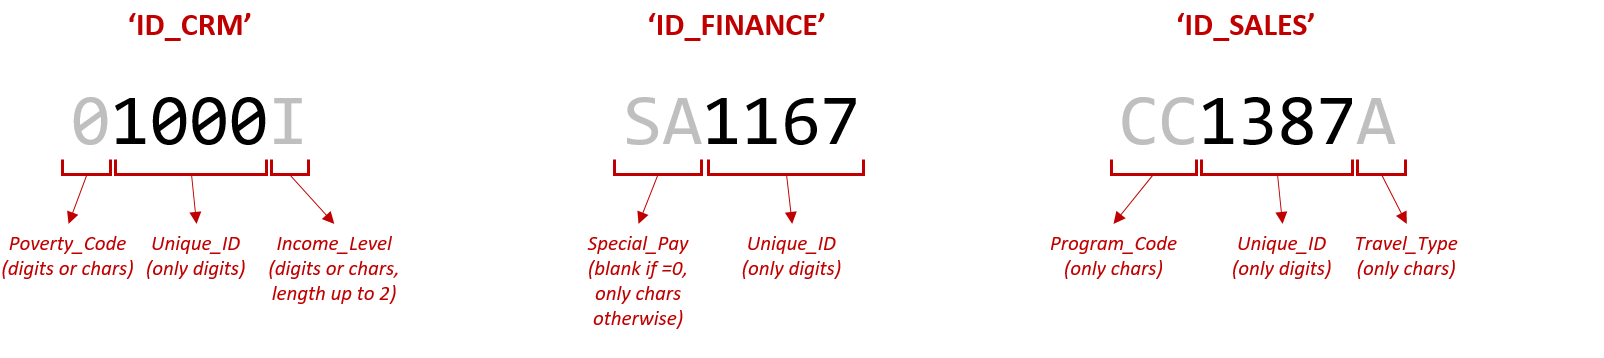

In [7]:
#df_crm unique_id extraction
df_crm.id = np.where(df_crm.Income_Level.str.len() == 2,\
                     df_crm.id.str.slice(start = 1, stop = -2),\
                     df_crm.id.str.slice(start = 1, stop = -1))

#df_finance unique_id extraction
df_finance.id = np.where(df_finance.Special_Pay.str.len() == 2,\
                         df_finance.id.str.slice(start = 2),\
                         df_finance.id.str.slice(start = 0))

#df_sales unique_id extraction
df_sales.id = np.where(df_sales.Program_Code.str.len() == 2,\
                       df_sales.id.str.slice(start = 2, stop = -1),\
                       df_sales.id.str.slice(start = 3, stop = -1))

#df_twitter unique_id extraction
df_twitter.id = df_twitter.id.str.extract(r'(\d+)', expand=False)

In [8]:
# create a single table to join the first 3 datasets
df_total = df_sales.merge(df_crm, on="id", how="left").merge(df_finance, on="id", how="left") #.merge(df_twitter, on="unique_id", how="left")

In [9]:
#to export in excel
df_total.to_excel(persoenliche_variablen.path_data + '/Data_Scientist_Project_Work/total.xlsx')

In [11]:
#Kopie der Exceltabelle auf O/33/MNC
import os
befehl = 'scp ' + persoenliche_variablen.path_data + '/Data_Scientist_Project_Work/total.xlsx ' + "'" + 'de' + '\\' + persoenliche_variablen.user + "'" + "@lde510fp.de.top.com:/media/o_33_mnc/"
print(befehl)
os.system(befehl)

scp /home/v092403//PycharmProjects/P0407/P0407/data//Data_Scientist_Project_Work/total.xlsx 'de\v092403'@lde510fp.de.top.com:/media/o_33_mnc/


0

### Consistency check on Data (TBC)

In [12]:
df_total['RPL_delta'] = pd.to_datetime(df_total['Latest_RPL']) - pd.to_datetime(df_total['Early_RPL'])
df_total[{'Latest_RPL','Early_RPL','RPL_delta'}].loc[df_total['RPL_delta'].dt.days < 0]

,RPL_delta,Early_RPL,Latest_RPL
0,-31 days,05/11/2018,04/10/2018
8,-3 days,03/13/2018,03/10/2018
12,-13 days,11/08/2017,10/26/2017
14,-24 days,05/16/2018,04/22/2018
19,-1 days,01/29/2018,01/28/2018
...,...,...,...
3905,-27 days,08/18/2018,07/22/2018
4002,-20 days,04/20/2018,03/31/2018
4074,-22 days,03/30/2018,03/08/2018
4118,-7 days,04/30/2018,04/23/2018


In [13]:
df_total['Days_check'] = pd.to_datetime(df_total['Return_Date']) - pd.to_datetime(df_total['Departure_Date'])
df_total[{'Departure_Date','Return_Date','Days', 'Days_check'}]

,Return_Date,Days,Departure_Date,Days_check
0,05/01/2019,24,04/07/2019,24 days
1,05/18/2019,18,04/30/2019,18 days
2,03/30/2019,13,03/17/2019,13 days
3,06/01/2019,24,05/08/2019,24 days
4,03/30/2019,13,03/17/2019,13 days
...,...,...,...,...
4148,04/22/2019,18,04/04/2019,18 days
4149,04/03/2019,13,03/21/2019,13 days
4150,05/06/2019,20,04/16/2019,20 days
4151,06/11/2019,10,06/01/2019,10 days


In [14]:
df_total['FPP_to_School_enrollment_check'] = df_total['FPP'] / df_total['Total_School_Enrollment']
df_total[{'FPP_to_School_enrollment_check', 'FPP_to_School_enrollment', 'FPP', 'Total_School_Enrollment'}]

,FPP,FPP_to_School_enrollment_check,FPP_to_School_enrollment,Total_School_Enrollment
0,26,0.132653,"0,126429354314411",196.0
1,21,0.205882,"0,173405156631824",102.0
2,7,NaN,"0,108985714542943",NaN
3,26,0.164557,"0,142807017036153",158.0
4,7,0.127273,"0,108985714542943",55.0
...,...,...,...,...
4148,12,0.018634,"0,014665665548888",644.0
4149,13,0.014317,"0,01776427530478",908.0
4150,4,0.007233,"0,006920828413484",553.0
4151,10,0.007955,"0,009419789252674",1257.0


In [15]:
df_total['Total_Pax_check'] = df_total['FPP'] + df_total['Total_Discount_Pax'] + df_total['Num_of_Non_FPP_PAX']
df_total[{'Total_Pax_check','Total_Pax','FPP','Total_Discount_Pax','Num_of_Non_FPP_PAX'}]

,FPP,Total_Discount_Pax,Total_Pax_check,Num_of_Non_FPP_PAX,Total_Pax
0,26,1,28.0,1.0,29
1,21,3,27.0,3.0,22
2,7,1,NaN,NaN,7
3,26,3,32.0,3.0,25
4,7,1,9.0,1.0,7
...,...,...,...,...,...
4148,12,1,14.0,1.0,11
4149,13,1,15.0,1.0,17
4150,4,2,8.0,2.0,6
4151,10,2,14.0,2.0,12


### Topic & Sentiment Analysis of tweets (TBC)

In [34]:
df_twitter['frequency'] = df_twitter['id'].map(df_twitter['id'].value_counts())

In [35]:
df_twitter['message'] = df_twitter.groupby('id')['text'].transform(lambda x: ','.join(x))
df_twitter_merged = df_twitter[{'id','frequency','message'}].drop_duplicates()
df_twitter_merged.reset_index(drop=True, inplace=True)

#pd.set_option('display.max_colwidth', 50)
df_twitter_merged

,frequency,message,id
0,3,"Lastly, for a company that's trying to put th...",1927
1,3,what about for us that cant get to the states...,4244
2,3,an already pleasant flight from London to Cha...,108
3,3,She could even see that I had tried to make t...,4335
4,3,but seriously if my cats dead I'm going to be...,416
...,...,...,...
4143,3,"Headphone jack not working on my flight., as ...",2795
4144,3,:take note of this great example of actually...,2383
4145,3,Northern California coast http://t.co/nm4VNN...,3570
4146,3,"I am But Your customer service is Brutal., Ha...",4426


In [239]:
# sentiment analysis
sentence = "Generali is the best insurance company!" 
#sentence = df_twitter_merged[df_twitter_merged['id'] == '4426'].message.to_numpy()[0]
analysis = TextBlob(sentence).sentiment
analysis

Sentiment(polarity=1.0, subjectivity=0.3)

#Questions out of groupmeeting 2 (05.03.2021)
Objective
1.	Retained – target value
What is it we want to predict here? How should we interpret the target variable 0/1? Does a “1” mean that this school has been on this trip during this date and will go again next time on the same trip? Or did they already go on a before and are doing again now? What is the correct interpretation here?
And thus, what does one line of the aggregated data mean? We think it is: one school goes on one destination trip during a certain date period. Is this correct?
              All data is from year t. We want to predict if they come back at year t+1. If they come back, target value = 1. One row is one class on a trip that year.
              Do last year students not come back on the next year? Don’t know, to be verified in the data.
From CRM dataset
2.	Poverty_code
There are 1053 values of “0”. What should we consider this (because unclassified should be “E” and not “0”)?
              = Missing data.
Remove row/column/replace with the most common value (is there a pattern? Ex: school is too small)/replace with most common value on a subgroup.
              Try to derive an approximation from other columns (ex: for date)
 
3.	CRM segment
There are 12 missing values (blank), how to treat them?
See question 2
4.	School_Type
Can we take the assumption that the values Catholic & CHD are private schools?
Disjoint classes - irrelevant
5.	Lowest grade
Does K refer to Kindergarten and PK to Pre-Kindergarten? Yes
What is the ranking of the different grades? PK-K and then ascending (ordinal)
 
6.	Income level
Do P1 – P5 refer to a ranking from lowest to highest for letter P? Yes (check census.gov)
There are 104 value with “0”. Does it mean the information is not available or is it to be considered as letter “O”? Missing data (see previous question)
How should we treat the missing values, since it is a categorical variable? (see before)
 
7.	SPR_New_Existing
Is the value = 1 when we are talking about a new client? Yes (irrelevant variable)
 
8.	DifferenceTraveltofirstMeeting & DifferenceTraveltoLastMeeting
There are respectively 3 and 6 negative values in these columns. What is the interpretation to a negative number? This seems like an error to us. But since it is a date, it is not clear with what to replace it. Adjust date compared to rest of milestones in timeline or (decide not to use it)
Idem for the 596 missing values. (see previous)
 
9.	FirstMeeting & LastMeeting
There are 1.232 rows in which FirstMeeting > LastMeeting. Is this an error? (see question 8)
10.	NumberOfMeetingswithParents
There are almost 2.400 rows in which: NumberOfMeetingswithParents = 1 but we have 2 different dates for FirstMeeting and LastMeeting. Is this an error? Check how much days are between, then take mean. Otherwise drop one. Or invert them.
 
From Sales Dataset
11.	From_Grade & To_Grade
Should we complete missing values with zero’s or do something else? See question before
 
12.	Early_RPL & Latest_RPL
There are 1049 values where the Latest_RPL is before the Early_RPL. Is this an error? See question before: how different are they? Just one value: mean or one of both or invert them
 
13.	FPP_to_School_enrollment
When we recalculate the ratio ourselves, the result is it not equal to FPP divided by Total_School_Enrollment. How can we obtain more information about this?
              You can use your own calculation if the displayed computation is not aligned with the definition, and drop the calculated variable provided. It won’t be exactly the same, but should be close.
 
14.	GroupGradeType
What does this variable mean?
The range of grades that participate in the trip (depending on GroupGradeTypeHigh/Low) à show heterogeneity of trip group. Both variables can add meaning.
              
15.	Departure_Date vs. DepartureMonth
Those dates are not aligned with eachother. DepartureMonth has only values in January in December. While Departure_Date has dates all over time. It seems more reliable to consider Departure_Date as the correct one. 
              OK
 
16.	Total_Pax vs. FPP & Total_Discount_Pax
With reference to following definitions:
Total_discount_pax = number of extra passengers
Total_pax = number of all passengers (including extra)
FPP = number of full-payment participant
Num_of_Non_FPP_PAX = number of non full-payment participant
None of below logic seems to work:
Total_pax – total_discount_pax = total full payment? = not equal in 3479 cases
or
Total_pax – total_discount_pax – Num_of_Non_FPP_PAX = total full payment? = not equal in 3675 cases
or
Total_discount_pax = Num_of_Non_FPP_PAX? Not equal in 699 cases
 
Where can we get information of which data is more reliable and can be used?
 
              How different are the recomputation. Otherwise take your own recalculation (see previous question)      
 
17.	Initial_System_Date
How should we interpret this variable? (first time trip was organized? Input in the system? First scheduled date?)
              First time sales guy input the potential trip in database, start of collaboration for trip
 
18.	MajorProgramCode
The aggregation is done based on the first letter of Program_Code, except for one starting with “F”. Is this correct or an error?
              This is only relevant for 4 cases, can be replaced.
From Finance Dataset
19.	FPP_to_PAX
When we recalculate the ratio, it is not equal to FPP divided by Total_PAX. With respect to what should the percentage of FPP be calculated?
              See previous question: create your own variable
 
20.	FRP_Active vs. FRP_Cancelled
FRP_Active: FPPs who bought insurance
FRP_Cancelled: FPPs who bought insurance and cancelled
I would expect cancelled to be in the interval between (0-FRP_Active), but in 220 cases, the number of cancelled is higher than number of bought, is my assumption incorrect or is the data incorrect?
If cancel > active, take at most the maximum. The difference is small.
21.	SRP_Group_Revenue vs Tuition
SPR_Group_Revenue seems to be around the same value as Tuition – Tuition says it is supposed to be Price per full-payment 1 participant, while Revenue is supposed to be amount paid for all participants (Tuition – Price of 1 unit vs Revenue – Amount for all units)
My expectation is that Revenue should be higher in comparison to tuition by the factor of +- number of participants. Is my understanding correct? Yes. 

In [72]:
#9.FirstMeeting & LastMeeting
#There are 1.232 rows in which FirstMeeting > LastMeeting. Is this an error? (see question 8)

#relevant columns
#Parent_Meeting_Flag (0, 1)
#NumberOfMeetingswithParents (1, 2, blank)
#FirstMeeting
#LastMeeting
#DifferenceTraveltoFirstMeeting
#DifferenceTraveltoLastMeeting
#Departure_Date
#Return_Date

df_total[{'Parent_Meeting_Flag', 'NumberOfMeetingswithParents','FirstMeeting','LastMeeting','DifferenceTraveltoFirstMeeting','DifferenceTraveltoLastMeeting','Departure_Date', 'Return_Date'}]

,NumberOfMeetingswithParents,DifferenceTraveltoLastMeeting,FirstMeeting,Parent_Meeting_Flag,Departure_Date,LastMeeting,DifferenceTraveltoFirstMeeting,Return_Date
0,2.0,215.0,05/10/2018,1.0,04/07/2019,09/04/2018,332.0,05/01/2019
1,1.0,244.0,09/04/2018,1.0,04/30/2019,08/29/2018,238.0,05/18/2019
2,NaN,NaN,NaN,NaN,03/17/2019,NaN,NaN,03/30/2019
3,1.0,254.0,08/16/2018,1.0,05/08/2019,08/27/2018,265.0,06/01/2019
4,1.0,189.0,09/18/2018,1.0,03/17/2019,09/09/2018,180.0,03/30/2019
...,...,...,...,...,...,...,...,...
4148,1.0,187.0,09/25/2018,1.0,04/04/2019,09/29/2018,191.0,04/22/2019
4149,1.0,191.0,09/14/2018,1.0,03/21/2019,09/11/2018,188.0,04/03/2019
4150,1.0,208.0,09/27/2018,1.0,04/16/2019,09/20/2018,201.0,05/06/2019
4151,1.0,269.0,09/20/2018,1.0,06/01/2019,09/05/2018,254.0,06/11/2019


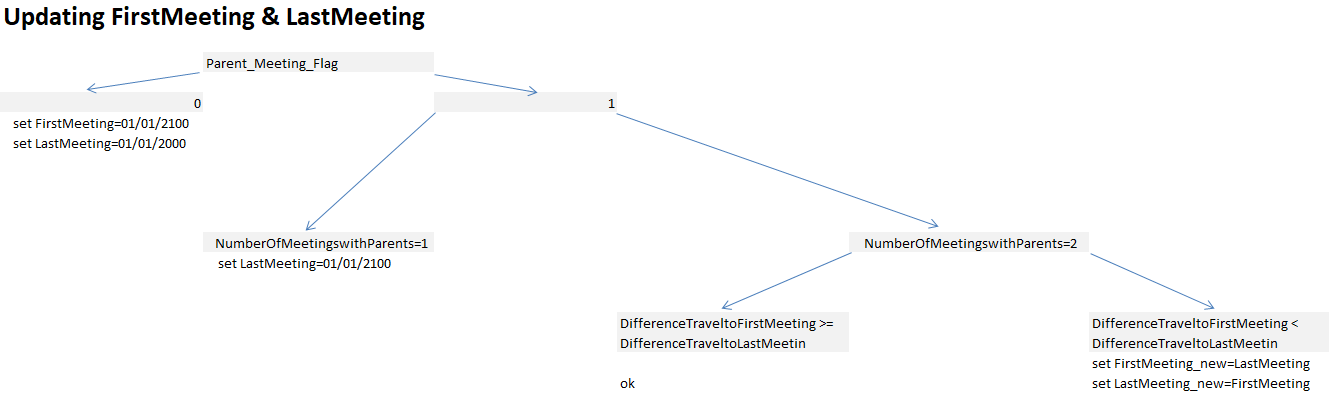

In [73]:
df_total_apply_01=df_total.copy()
#Create temp columns
df_total_apply_01["FirstMeeting_temp"] = df_total_apply_01["FirstMeeting"]
df_total_apply_01["LastMeeting_temp"] = df_total_apply_01["LastMeeting"]
##
df_total_apply_01.loc[df_total_apply_01['Parent_Meeting_Flag'] == 0, 'FirstMeeting'] = '01/01/2000'
df_total_apply_01.loc[df_total_apply_01['Parent_Meeting_Flag'] == 0, 'LastMeeting'] = '01/01/2100' 
##
df_total_apply_01.loc[(df_total_apply_01['Parent_Meeting_Flag'] == 1) & (df_total_apply_01['NumberOfMeetingswithParents'] == 1), 'LastMeeting'] = '01/01/2100' 
##
df_total_apply_01.loc[(df_total_apply_01['Parent_Meeting_Flag'] == 1) & (df_total_apply_01['NumberOfMeetingswithParents'] == 2) & (df_total_apply_01['DifferenceTraveltoFirstMeeting'] < df_total_apply_01['DifferenceTraveltoLastMeeting']), 'FirstMeeting'] = df_total_apply_01['LastMeeting_temp']
df_total_apply_01.loc[(df_total_apply_01['Parent_Meeting_Flag'] == 1) & (df_total_apply_01['NumberOfMeetingswithParents'] == 2) & (df_total_apply_01['DifferenceTraveltoFirstMeeting'] < df_total_apply_01['DifferenceTraveltoLastMeeting']), 'LastMeeting'] = df_total_apply_01['FirstMeeting_temp']
#delete temp columns
df_total_apply_01=df_total_apply_01.drop(columns=['FirstMeeting_temp', 'LastMeeting_temp'])

df_total_apply_01

,id,Program_Code,From_Grade,To_Grade,Group_State,Days,Travel_Type,Departure_Date,Return_Date,Early_RPL,Latest_RPL,Cancelled_Pax,Total_Discount_Pax,Initial_System_Date,SPR_Product_Type,FPP,Total_Pax,DepartureMonth,GroupGradeTypeLow,GroupGradeTypeHigh,GroupGradeType,MajorProgramCode,FPP_to_School_enrollment,Retained,Poverty_Code,...,SPR_New_Existing,NumberOfMeetingswithParents,FirstMeeting,LastMeeting,DifferenceTraveltoFirstMeeting,DifferenceTraveltoLastMeeting,SchoolGradeTypeLow,SchoolGradeTypeHigh,SchoolGradeType,SchoolSizeIndicator,Deposit_Date,Special_Pay,Tuition,FRP_Active,FRP_Cancelled,FRP_Take_up_percent_,EZ_Pay_Take_Up_Rate,School_Sponsor,SPR_Group_Revenue,FPP_to_PAX,Num_of_Non_FPP_PAX,RPL_delta,Days_check,FPP_to_School_enrollment_check,Total_Pax_check
0,1387,CC,10.0,10.0,CA,24,A,04/07/2019,05/01/2019,05/11/2018,04/10/2018,2,1,04/01/2018,East Coast,26,29,January,K,High,K->High,C,"0,126429354314411",1,0,...,1.0,2.0,05/10/2018,09/04/2018,332.0,215.0,Middle,Middle,Middle->Middle,S,05/22/2018,NA,2383.0,9.0,1.0,"0,34574559493049","0,103221687115555",0.0,2167.0,"0,99141462545603",1.0,-31 days,24 days,0.132653,28.0
1,139,CC,5.0,6.0,CA,18,A,04/30/2019,05/18/2019,03/05/2018,03/06/2018,2,3,03/16/2018,East Coast,21,22,January,PK,Middle,PK->Middle,C,"0,173405156631824",0,0,...,0.0,1.0,09/04/2018,01/01/2100,238.0,244.0,Middle,Middle,Middle->Middle,S,10/22/2018,NA,2629.0,12.0,3.0,"0,570243822206344","0,119431395449224",0.0,2708.0,"0,888166109478944",3.0,1 days,18 days,0.205882,27.0
2,1600,CC,7.0,7.0,OR,13,A,03/17/2019,03/30/2019,NaN,NaN,0,1,08/03/2018,East Coast,7,7,January,K,Middle,K->Middle,C,"0,108985714542943",1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,13 days,NaN,NaN
3,1701,CC,8.0,8.0,CA,24,A,05/08/2019,06/01/2019,02/07/2018,08/18/2018,5,3,02/06/2018,East Coast,26,25,January,PK,Middle,PK->Middle,C,"0,142807017036153",1,0,...,0.0,1.0,08/16/2018,01/01/2100,265.0,254.0,Middle,Middle,Middle->Middle,S,10/07/2018,NA,2353.0,9.0,3.0,"0,404058189011336","0,10402818131315",0.0,2148.0,"0,915160915093646",3.0,192 days,24 days,0.164557,32.0
4,1773,CC,7.0,7.0,OR,13,A,03/17/2019,03/30/2019,NaN,NaN,0,1,08/03/2018,East Coast,7,7,January,K,Middle,K->Middle,C,"0,108985714542943",1,0,...,1.0,1.0,09/18/2018,01/01/2100,180.0,189.0,Middle,Middle,Middle->Middle,S,10/29/2018,NA,2129.0,3.0,0.0,"0,517738200915211",0,1.0,1989.0,"0,866585225868707",1.0,NaT,13 days,0.127273,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4148,60,ST,7.0,9.0,WA,18,A,04/04/2019,04/22/2019,03/17/2018,09/26/2018,2,1,02/05/2018,Science,12,11,January,Middle,High,Middle->High,S,"0,014665665548888",0,A,...,0.0,1.0,09/25/2018,01/01/2100,191.0,187.0,Middle,High,Middle->High,M-L,10/27/2018,NA,2234.0,7.0,2.0,"0,661466851537078","0,100751212241188",0.0,1970.0,"0,910949970533674",1.0,193 days,18 days,0.018634,14.0
4149,809,ST,6.0,8.0,WA,13,A,03/21/2019,04/03/2019,03/05/2018,09/13/2018,3,1,02/02/2018,Science,13,17,January,Elementary,Middle,Elementary->Middle,S,"0,01776427530478",1,B,...,0.0,1.0,09/14/2018,01/01/2100,188.0,191.0,Middle,Middle,Middle->Middle,L,11/28/2018,NA,2015.0,9.0,2.0,"0,608024884991947","0,123102826630101",0.0,1873.0,"0,944781698849715",1.0,192 days,13 days,0.014317,15.0
4150,925,ST,8.0,12.0,NJ,20,A,04/16/2019,05/06/2019,01/21/2018,09/25/2018,2,2,01/25/2018,Science,4,6,January,Middle,Middle,Middle->Middle,S,"0,006920828413484",0,B,...,0.0,1.0,09/27/2018,01/01/2100,201.0,208.0,Middle,High,Middle->High,S-M,10/31/2018,NA,1797.0,4.0,2.0,"1,03828076249543",0,0.0,1857.0,"0,672193466643264",2.0,247 days,20 days,0.007233,8.0
4151,928,ST,7.0,8.0,OK,10,A,06/01/2019,06/11/2019,03/09/2018,08/30/2018,2,2,03/27/2018,Science,10,12,January,Middle,Middle,Middle->Middle,S,"0,009419789252674",1,B,...,0.0,1.0,09/20/2018,01/01/2100,254.0,269.0,Middle,Middle,Middle->Middle,L,10/

In [74]:
#check
df_total_apply_01['Meeting_delta'] = pd.to_datetime(df_total_apply_01['LastMeeting']) - pd.to_datetime(df_total_apply_01['FirstMeeting'])
df_total_apply_01[{'LastMeeting','FirstMeeting','Meeting_delta'}].loc[df_total_apply_01['Meeting_delta'].dt.days < 0]

,LastMeeting,FirstMeeting,Meeting_delta


In [75]:
#to export in excel
df_total_apply_01.to_excel(persoenliche_variablen.path_data + '/Data_Scientist_Project_Work/total_apply_01.xlsx')

In [76]:
#Kopie der Exceltabelle auf O/33/MNC
import os
befehl = 'scp ' + persoenliche_variablen.path_data + '/Data_Scientist_Project_Work/total_apply_01.xlsx ' + "'" + 'de' + '\\' + persoenliche_variablen.user + "'" + "@lde510fp.de.top.com:/media/o_33_mnc/"
print(befehl)
os.system(befehl)

scp /home/v092403//PycharmProjects/P0407/P0407/data//Data_Scientist_Project_Work/total_apply_01.xlsx 'de\v092403'@lde510fp.de.top.com:/media/o_33_mnc/


0

In [ ]:
#iterative imputer in sikitlearn testing (simple imputer)
#link: https://scikit-learn.org/stable/modules/impute.html
#encoder sikitlearn nutzen --> Nointeger (onehot) replace to Interger
#Ordinal: replace by number Number 